# Fundamentals of Data Analysis Project
**Clare Tubridy**
***

In [1]:
# Imports for all the tasks.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

## Task 1 - Collatz Conjecture
> The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive
integer x and repeatedly apply the function f(x) below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .
>
>$ f(x) = x ÷ 2 $ if *x* is even <br>
>$ f(x) = 3*(x) + 1 $ if *x* is odd
>
> Your task is to verify, using Python, that the conjecture is true for
the first 10,000 positive integers.

In [2]:
def f(x):
    # If x is even divide by two:
    if x % 2 == 0:
        return x // 2
    else:
        return (3 * x) + 1

In [3]:
def collatz(x):
    print(f'Testing Collatz with intial value {x}')
    while x !=1:
        x = f(x)
        print(x, end=' ')

In [4]:
collatz(5)

Testing Collatz with intial value 5
16 8 4 2 1 

***
## Task 2 - Penguin Dataset
> Give an overview of the famous penguins data set, explaining
the types of variables it contains. Suggest the types of variables
that should be used to model them in Python, explaining your
rationale.

### Overview of the Dataset
The "Penguins" dataset is a popular and commonly used dataset in the field of data science and machine learning. The dataset contains information about various characteristics of different penguin species. It is great introduction dataset for data exploration and visualization. It is often used for tasks such as classifcation, regression, and exploratory data analysis. This section will provide an overview of the variables it contains and the suggested types of variables to model them in Python.

### Reading in the Dataset

In [5]:
# Reads in the dataset.
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
# Summary of the dataframes basic information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Types of Variables
The rationale for choosing these variable types and representation is to ensure efficent data ahndling and modeling in Python. Categorical variables are best represented as categorical data types in pandas for memory efficiency and improved performance, while numeric variables can be represented using native Python data types.

The dataset consists of 7 columns:
- **species**: This variable represents penguin species. It is a catergorical variable with three possible values: "Chinstrap", "Adeile", and "Gentroo". It can be represented as a categorical variable using **'pandas'**.
- **island**: This variable indicates the island where the penguins were observed. It is also a categorical variable with three possible values: "Dream", "Torgersen", and "Biscoe" in Antarctica. The **'pandas'** library can be used to represent it as a categorical data type.
- **bill_length_mm**: This variable represents the length of the penguins bill in millimeters. It is a numeric variable with continuous values. Pythons native numeric data types (e.g. float) can be used to represent this variable.
- **bill_depth_mm**: This variable represents the depth of the penguins bill in millimeters. Like bill length, it is a numeric variable with continuous values and can be represent using Pythons numeric data types. 
- **flipper_length_mm**: This variable indicates the penguins flipper length in millimeters. It is another numeric variable with continuous values and can be represented using Pythons numeric data types.
- **body_mass_g**: This variable represents the penguins body mass in grams. Similar to the other numeric values, it is continuous and can be represented using Pythons numeric data types.
- **sex**: This variable indicates the gender of the penguin and it is a categorical variable with two possible values: "Male" and "Female". It can be represented as a categorical variable using **'pandas'**.

***
## Task 3
>  For each of the variables in the penguins data set, suggest what probability distribution from the numpy random distributions list
is the most appropriate to model the variable.

#### Categorical Variables
Categorical variables such as Species and Island are not modeled with probability distribution directly. Instead of using a probability distribution for these variables, each category could be represented as an integer and use methods suitable for categorical data analysis. To simulate or generate synthetic data for a categorical variable, a discrete uniform distribution can be used to randomly assign integers representing different categories. 

In [7]:
# Determining the samples per Species.
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

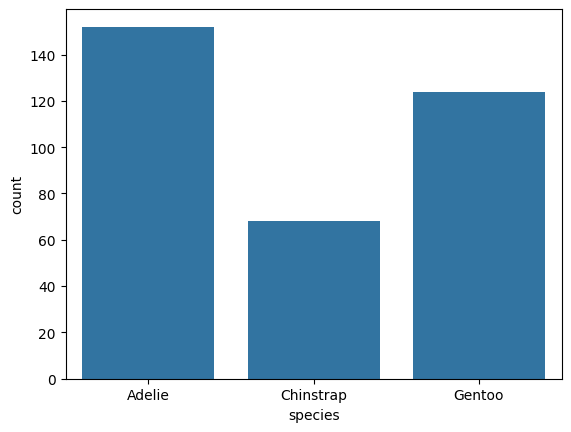

In [8]:
# Probability Distribution for Species variable.
sns.countplot(data = df, x = 'species')
plt.show()

In [9]:
# Determining the samples per Island.
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

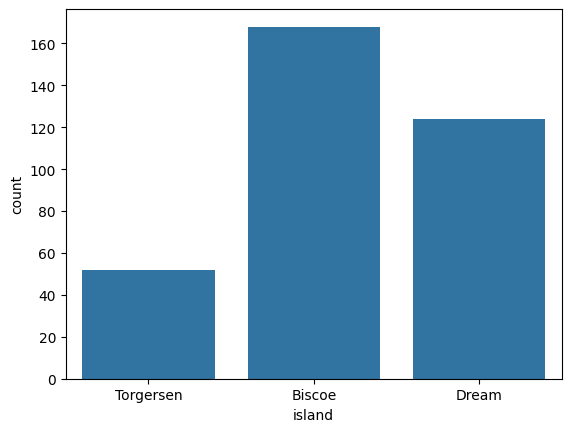

In [10]:
# Probability Distribution for Island variable.
sns.countplot(data = df, x = 'island')
plt.show()

In [11]:
# Simulating the categorical data of species.
# Define categories and their corresponding integer codes.
categories = ['Adelie', 'Chinstrap', 'Gentoo'] 
category_codes = {category: code for code, category in enumerate(categories)}

num_samples = 344  # Number of samples to generate.
simulated_data = np.random.randint(0, len(categories), size=num_samples)

In [12]:
# Map the integer codes back to the original categories.
simulated_categories = [categories[code] for code in simulated_data]

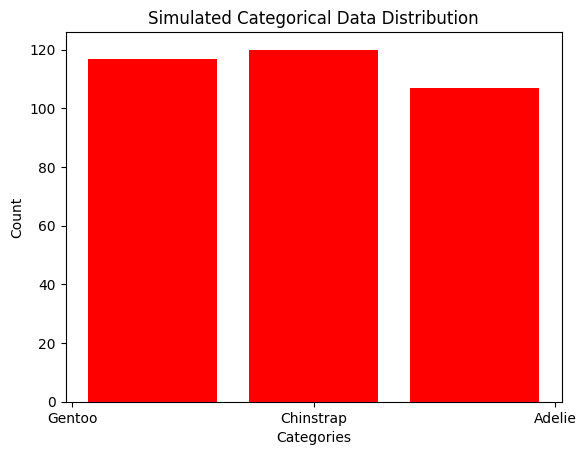

In [13]:
# Plot the distribution.
plt.hist(simulated_categories, bins=len(categories), rwidth=0.8, color='red')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Simulated Categorical Data Distribution')
plt.show()

#### Numeric Variables 
Bill Length, Bill Depth, Flipper Length and Body Mass should all follow a normal distribution as mass and lengths generally follow a bell-shaped curve. When considering numeric variables across different species, it's important to acknowledge the potential impact of species differences on the distribution of these variables. The choice of a normal distribution for simulation purposes assumes that the data is roughly bell-shaped and symmetric, which may be a reasonable assumption within individual species but might not accurately capture the overall distribution across all species. Different penguin species may have distinct characteristics, including size variations. For example, one species might be generally larger than another.

In [14]:
# Probability Distribution for numerical variables.
# Select numerical columns.
columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

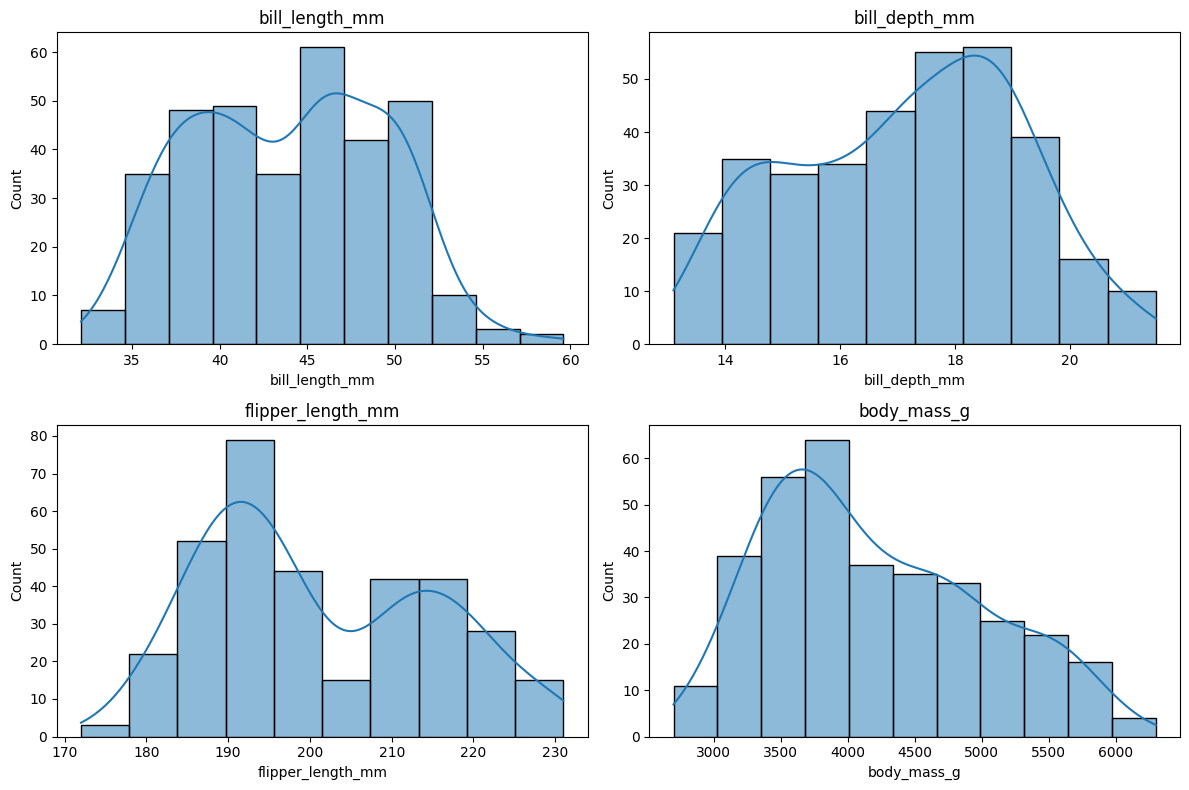

In [15]:
# Create subplots for each numerical variable.
# Creates a 2 x 2 grid.
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns):
    row, col_index = divmod(i, 2)
    sns.histplot(data = df, x = col, kde = True, ax = axes[row, col_index])
    axes[row, col_index].set_title(col)

plt.tight_layout()
plt.show()

The graphs above show the combined distribution of Bill Length (mm), Bill Depth (mm), Flipper Length (mm) and Body Mass (g) across all three penguin species. However, it is evident that the distributions are not exhibiting the expected normal distribution characteristics. This discrepancy is likely attributed to the fact that different penguin species exhibit distinct sizes, influencing the overall distribution.

To address this issue and gain a more accurate representation of the distribution, we can focus on a single species. By isolating the data for a single species, we can better observe the inherent characteristics and variability within that particular group. This approach allows us to explore whether the assumption of a normal distribution holds more consistently within individual species.

In [16]:
# Filter the dataframe to include only the selected species.
df_adelie = df[df['species'] == 'Adelie']

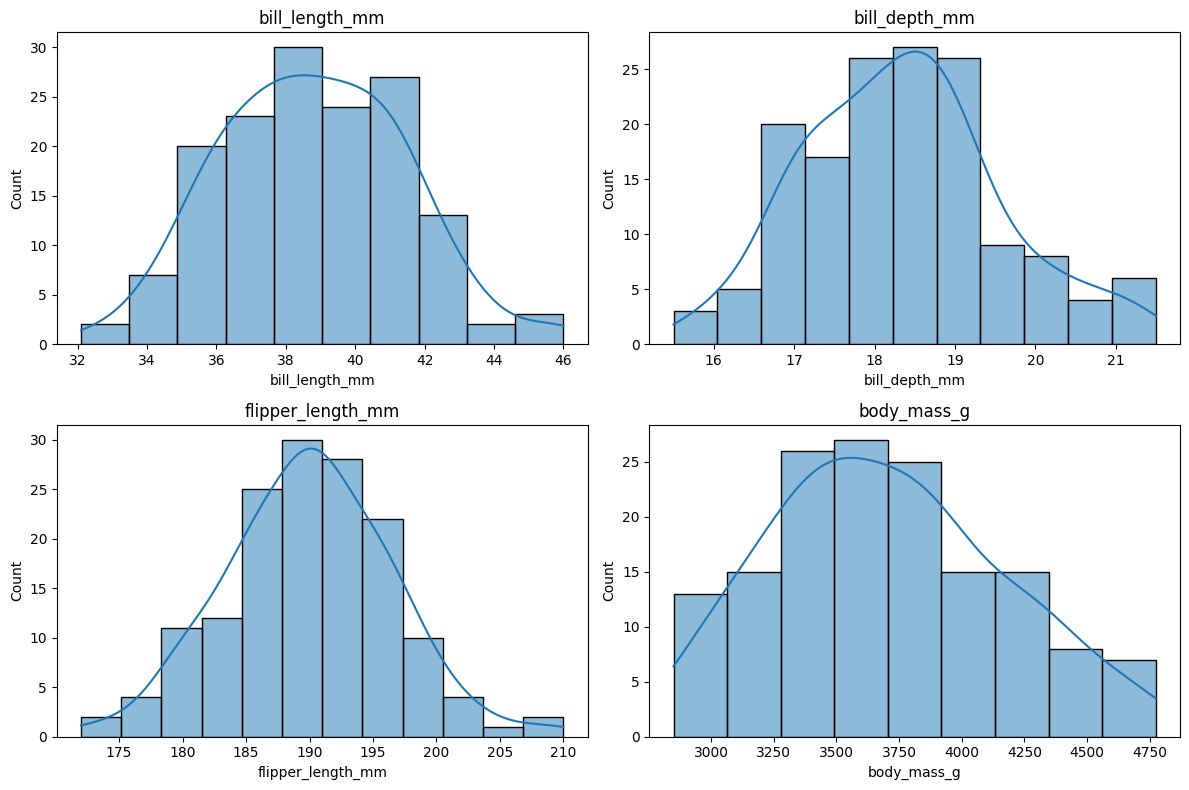

In [17]:
# Create subplots for each numerical variable.
# Creates a 2 x 2 grid.
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(columns):
    row, col_index = divmod(i, 2)
    sns.histplot(data = df_adelie, x = col, kde = True, ax = axes[row, col_index])
    axes[row, col_index].set_title(col)

plt.tight_layout()
plt.show()

After narrowing our focus to the 'Adelie' species and modifying the analysis accordingly, the distributions of the numerical variables now exhibit patterns more in line with our expectations. Bill length and flipper length being the closest to a normal distribution. 

In [18]:
# Simulate Flipper length for 'Species A'.
species_a_data = np.random.normal(loc=1000, scale=100, size=100)

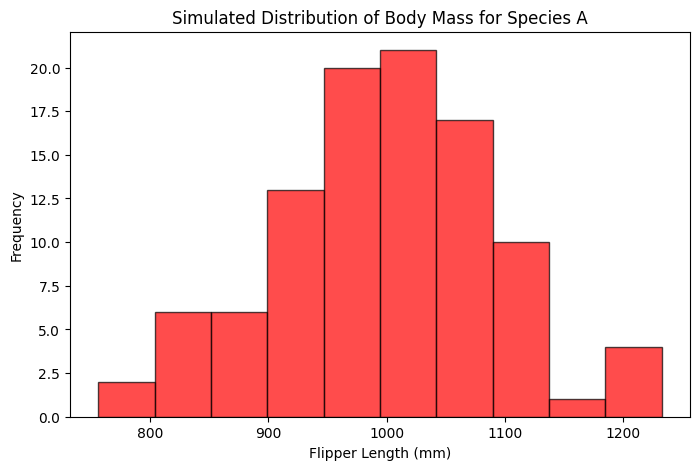

In [19]:
# Plot histogram for 'Species A'.
plt.figure(figsize=(8, 5))
plt.hist(species_a_data, bins=10, alpha=0.7, color='red', edgecolor='black')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Frequency')
plt.title('Simulated Distribution of Body Mass for Species A')
plt.show()

#### Sex Variable
This variable can be considered a binary variable as it only has two possible outcomes ("Male" or "Female"). When dealing with binary variables, the Bernoulli distribution is often used to model the probability of success for a single binary event.

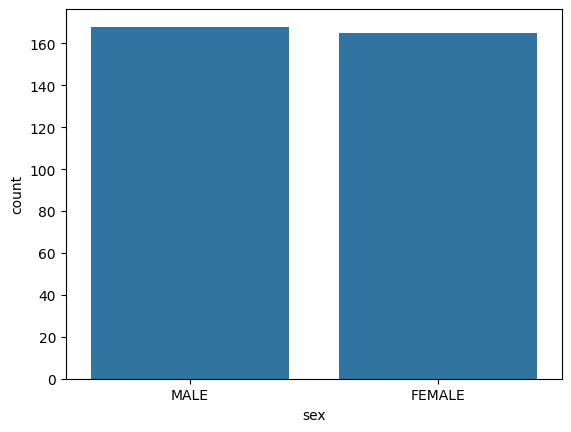

In [20]:
# Probability Distribution for Sex variable.
sns.countplot(data = df, x = 'sex')
plt.show()

In [21]:
# Assume a constant probability of being male.
p_male = 0.5

In [22]:
# Simulate binary outcomes (0 for Female, 1 for Male).
num_samples = 344
simulated_sex = np.random.binomial(1, p_male, num_samples)

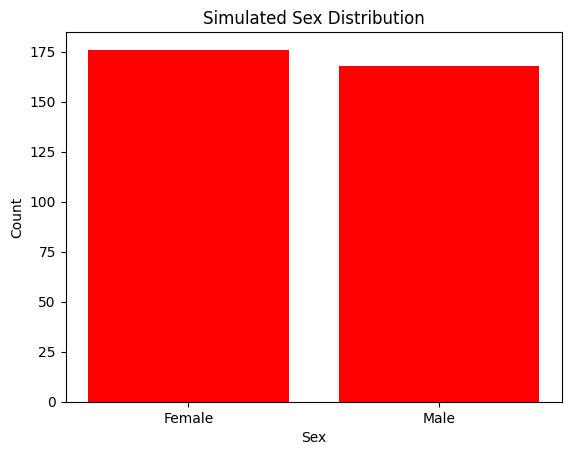

In [23]:
# Plot the distribution
# xticks() - https://www.geeksforgeeks.org/matplotlib-pyplot-xticks-in-python/
plt.hist(simulated_sex, bins=[-0.5, 0.5, 1.5], align='mid', rwidth=0.8, color='red')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Simulated Sex Distribution')
plt.show()

***
## Task 4
> Suppose you are flipping two coins, each with a probability p of
giving heads. Plot the entropy of the total number of heads versus
p.

***
## Task 5
> Create an appropriate individual plot for each of the variables in
the penguin data set.


***
## End